In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train = pd.read_csv('fraudTrain.csv')
test = pd.read_csv('fraudTest.csv')
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [ ]:
print(test.shape),print(train.shape)

(19466, 23)
(7815, 23)


(None, None)

In [ ]:
test.isnull().sum(), train.isnull().sum()

(Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     1
 state                    1
 zip                      1
 lat                      1
 long                     1
 city_pop                 1
 job                      1
 dob                      1
 trans_num                1
 unix_time                1
 merch_lat                1
 merch_long               1
 is_fraud                 1
 dtype: int64, Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   1
 street                   1
 city                     1
 state                    1
 zip  

In [ ]:
test.info(), train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19466 entries, 0 to 19465
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             19466 non-null  int64  
 1   trans_date_trans_time  19466 non-null  object 
 2   cc_num                 19466 non-null  int64  
 3   merchant               19466 non-null  object 
 4   category               19466 non-null  object 
 5   amt                    19466 non-null  float64
 6   first                  19466 non-null  object 
 7   last                   19466 non-null  object 
 8   gender                 19466 non-null  object 
 9   street                 19466 non-null  object 
 10  city                   19465 non-null  object 
 11  state                  19465 non-null  object 
 12  zip                    19465 non-null  float64
 13  lat                    19465 non-null  float64
 14  long                   19465 non-null  float64
 15  ci

(None, None)

In [ ]:
train['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'])
train['trans_date']=train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train['trans_date']=pd.to_datetime(train['trans_date'])
train['dob']=pd.to_datetime(train['dob'])

test['trans_date_trans_time']=pd.to_datetime(test['trans_date_trans_time'])
test['trans_date']=test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test['trans_date']=pd.to_datetime(test['trans_date'])
test['dob']=pd.to_datetime(test['dob'])

In [ ]:
test.trans_date.head(),test.dob.head(),train.trans_date.head(),train.dob.head()

(0   2020-06-21
 1   2020-06-21
 2   2020-06-21
 3   2020-06-21
 4   2020-06-21
 Name: trans_date, dtype: datetime64[ns], 0   1968-03-19
 1   1990-01-17
 2   1970-10-21
 3   1987-07-25
 4   1955-07-06
 Name: dob, dtype: datetime64[ns], 0   2019-01-01
 1   2019-01-01
 2   2019-01-01
 3   2019-01-01
 4   2019-01-01
 Name: trans_date, dtype: datetime64[ns], 0   1988-03-09
 1   1978-06-21
 2   1962-01-19
 3   1967-01-12
 4   1986-03-28
 Name: dob, dtype: datetime64[ns])

In [ ]:
train.drop("Unnamed: 0",axis=1,inplace=True)
test.drop("Unnamed: 0",axis=1,inplace=True)
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,2019-01-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,2019-01-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,2019-01-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0,2019-01-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0,2019-01-01


In [ ]:
total = pd.concat([test,train])
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27281 entries, 0 to 7814
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  27281 non-null  datetime64[ns]
 1   cc_num                 27281 non-null  int64         
 2   merchant               27281 non-null  object        
 3   category               27281 non-null  object        
 4   amt                    27281 non-null  float64       
 5   first                  27281 non-null  object        
 6   last                   27281 non-null  object        
 7   gender                 27280 non-null  object        
 8   street                 27280 non-null  object        
 9   city                   27279 non-null  object        
 10  state                  27279 non-null  object        
 11  zip                    27279 non-null  float64       
 12  lat                    27279 non-null  float64       
 13  lo

In [ ]:
total["is_fraud_cat"]=total.is_fraud.apply(lambda x: "T" if x==1 else "F")
total["is_fraud_cat"].astype("object")

0       F
1       F
2       F
3       F
4       F
       ..
7810    F
7811    F
7812    F
7813    F
7814    F
Name: is_fraud_cat, Length: 27281, dtype: object

In [ ]:
totalcat=total.select_dtypes(include=['object'])

In [ ]:
total[totalcat.columns]

,merchant,category,first,last,gender,street,city,state,job,trans_num,is_fraud_cat
0,fraud_Kirlin and Sons,personal_care,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,F
1,fraud_Sporer-Keebler,personal_care,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,F
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,"Librarian, public",c81755dbbbea9d5c77f094348a7579be,F
3,fraud_Haley Group,misc_pos,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,Set designer,2159175b9efe66dc301f149d3d5abf8c,F
4,fraud_Johnston-Casper,travel,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,Furniture designer,57ff021bd3f328f8738bb535c302a31b,F
...,...,...,...,...,...,...,...,...,...,...,...
7810,fraud_Murray-Smitham,grocery_pos,Jasmine,Foster,F,954 White Alley Apt. 251,Phil Campbell,AL,"Engineer, aeronautical",e11d567d20b74f412c644122f57b7152,F
7811,fraud_Hackett-Lueilwitz,grocery_pos,Justin,Gay,M,268 Hayes Rue Suite 811,Harborcreek,PA,Event organiser,dc5380f7b501f8fae23741ae9426ea87,F
7812,fraud_Koepp-Witting,grocery_pos,Shannon,Williams,F,9345 Spencer Junctions Suite 183,Alpharetta,GA,Prison officer,eefe1322ac9155ed949e3c71b35ccc37,F
7813,"fraud_Robel, Cummerata and Prosacco",gas_transport,Zachary,Allen,M,69252 Oconnor Alley Apt. 153,Ollie,IA,Commercial horticulturist,bb4b4d3d673dddf931fc71c12e090b1d,F


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


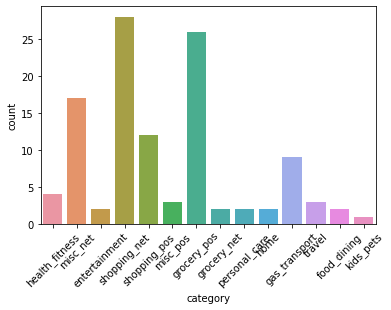

In [ ]:
sns.countplot(total[total['is_fraud_cat']=="T"].category)
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


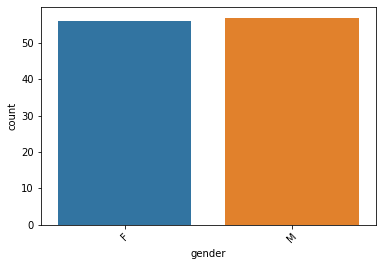

In [ ]:
sns.countplot(total[total['is_fraud_cat']=="T"].gender)
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


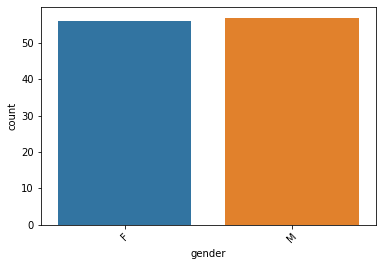

In [ ]:
sns.countplot(total[total['is_fraud_cat']=="T"].gender)
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


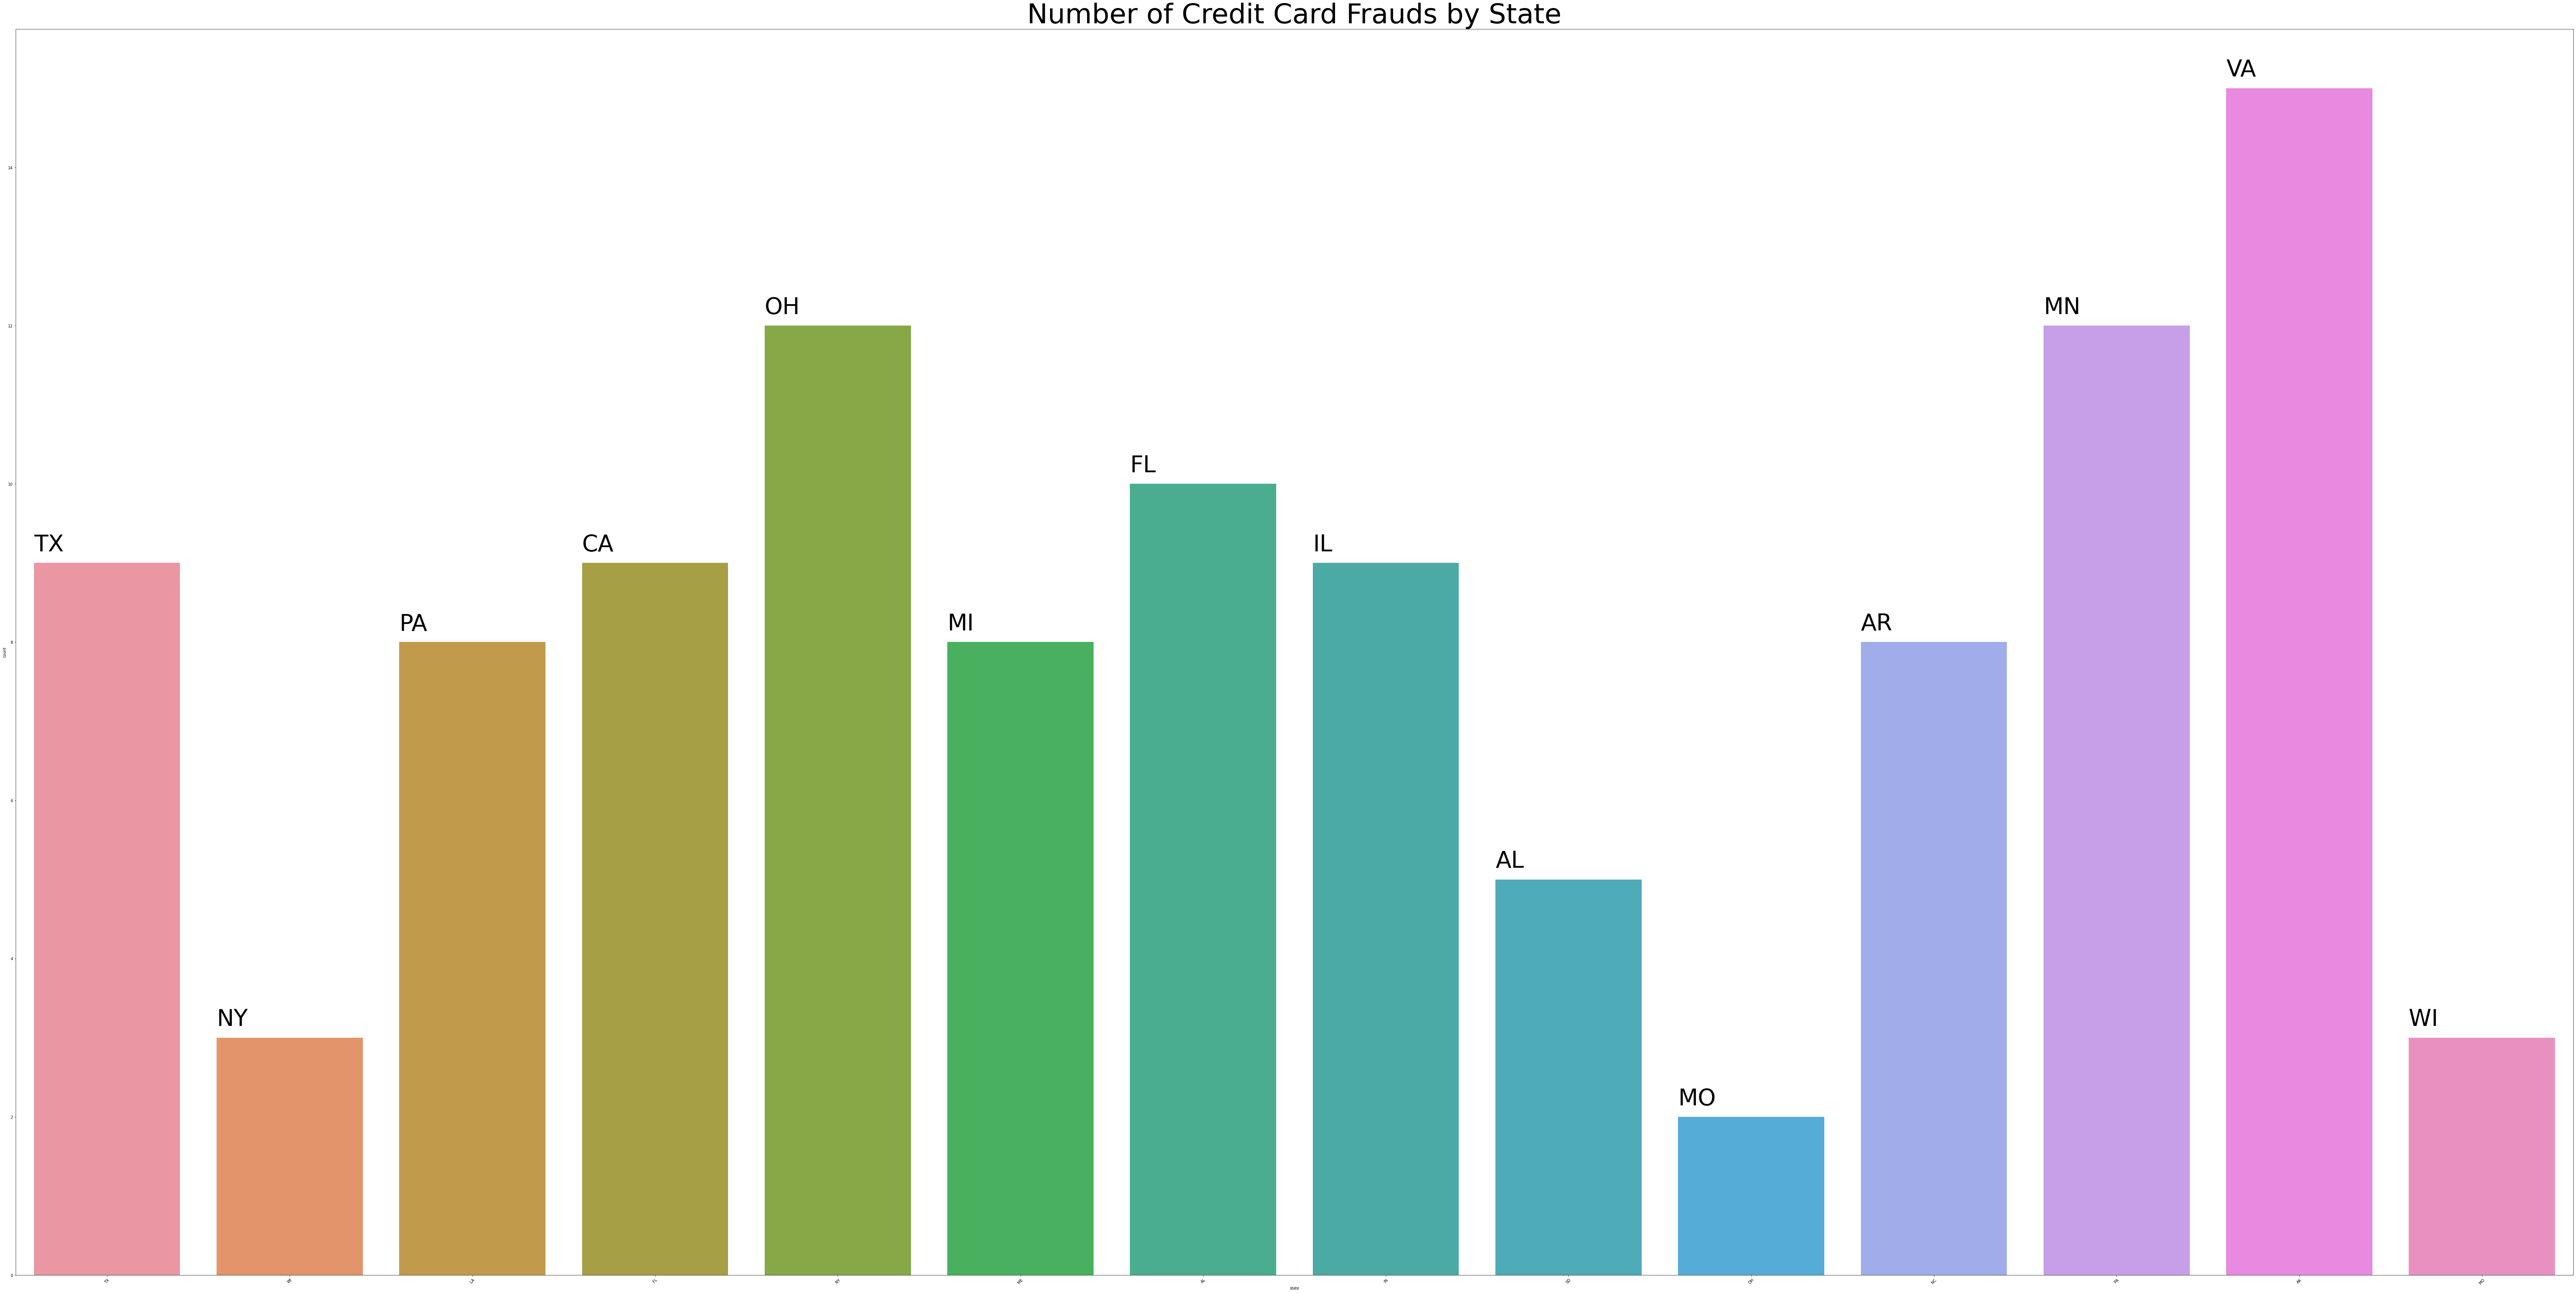

In [ ]:
fig, ax = plt.subplots(figsize=(120,60))
plt.rcParams.update({'font.size': 60})
sns.countplot(total[total['is_fraud_cat']=="T"].state)
plt.xticks(rotation=45)
for p, label in zip(ax.patches, total["state"].value_counts().index):
    ax.annotate(label, (p.get_x(), p.get_height()+0.15))
plt.title("Number of Credit Card Frauds by State")
plt.show()

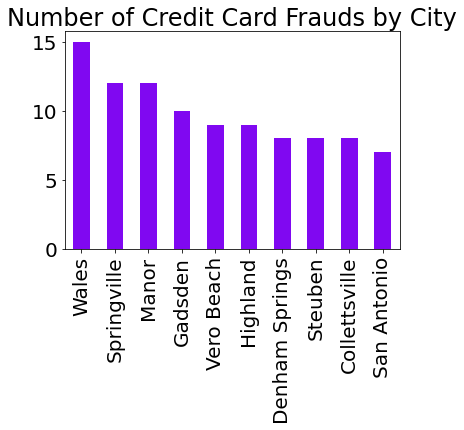

In [ ]:
import random
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb
plt.rcParams.update({'font.size': 20})
total[total['is_fraud_cat']=="T"]["city"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color=randomcolor())
plt.title("Number of Credit Card Frauds by City")
plt.show()

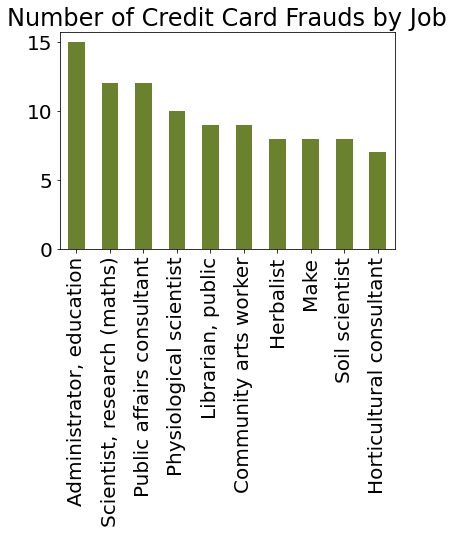

In [ ]:
total[total['is_fraud_cat']=="T"]["job"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color=randomcolor())
plt.title("Number of Credit Card Frauds by Job")
plt.show()

In [ ]:
del total['is_fraud_cat']
from scipy.stats import norm, skew

In [ ]:
testnum= test.select_dtypes(include=np.number)
test[testnum.columns]

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2291163933867244,2.86,29209.0,33.9659,-80.9355,333497.0,1.371817e+09,33.986391,-81.200714,0.0
1,3573030041201292,29.84,84002.0,40.3207,-110.4360,302.0,1.371817e+09,39.450498,-109.960431,0.0
2,3598215285024754,41.28,11710.0,40.6729,-73.5365,34496.0,1.371817e+09,40.495810,-74.196111,0.0
3,3591919803438423,60.05,32780.0,28.5697,-80.8191,54767.0,1.371817e+09,28.812398,-80.883061,0.0
4,3526826139003047,3.19,49632.0,44.2529,-85.0170,1126.0,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...
19461,3560697798177746,78.75,92210.0,33.7163,-116.3381,4677.0,1.372405e+09,34.640187,-116.625076,0.0
19462,30153452207526,12.09,76834.0,31.8287,-99.4270,5908.0,1.372405e+09,31.661750,-98.635733,0.0
19463,4792627764422477317,74.11,66018.0,38.9462,-94.9714,5760.0,1.372405e+09,38.486031,-95.101789,0.0
19464,3568255211412877,75.82,46765.0,41.2249,-85.0301,5341.0,1.372405e+09,42.035201,-85.267221,0.0


In [ ]:
total.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   1
street                   1
city                     2
state                    2
zip                      2
lat                      2
long                     2
city_pop                 2
job                      2
dob                      2
trans_num                2
unix_time                2
merch_lat                2
merch_long               2
is_fraud                 2
trans_date               0
dtype: int64

In [ ]:
total[testnum.columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27281 entries, 0 to 7814
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cc_num      27281 non-null  int64  
 1   amt         27281 non-null  float64
 2   zip         27279 non-null  float64
 3   lat         27279 non-null  float64
 4   long        27279 non-null  float64
 5   city_pop    27279 non-null  float64
 6   unix_time   27279 non-null  float64
 7   merch_lat   27279 non-null  float64
 8   merch_long  27279 non-null  float64
 9   is_fraud    27279 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.3 MB


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


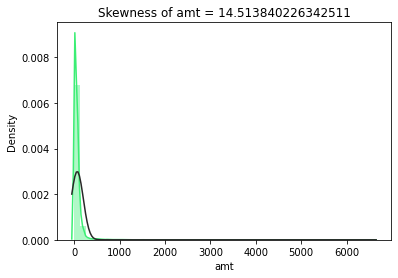

In [ ]:
plt.rcParams.update({'font.size': 10})
skewness = str(skew(total['amt']))
sns.distplot(total['amt'],fit = norm,color = randomcolor())
plt.title("Skewness of amt"+" = "+skewness)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


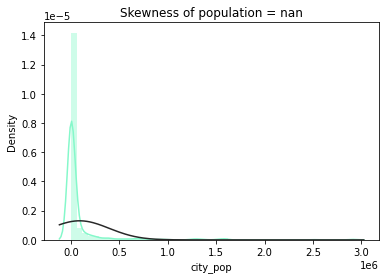

In [ ]:
skewness = str(skew(total['city_pop']))
sns.distplot(total['city_pop'],fit = norm,color = randomcolor())
plt.title("Skewness of population"+" = "+skewness)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


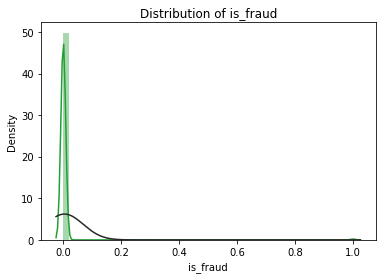

In [ ]:
sns.distplot(total['is_fraud'],fit = norm,color = randomcolor())
plt.title("Distribution of is_fraud")
plt.show()

In [ ]:
total.drop(['cc_num','merchant','first','last','street','zip','trans_num','unix_time'],axis=1,inplace=True)
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27281 entries, 0 to 7814
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  27281 non-null  datetime64[ns]
 1   category               27281 non-null  object        
 2   amt                    27281 non-null  float64       
 3   gender                 27280 non-null  object        
 4   city                   27279 non-null  object        
 5   state                  27279 non-null  object        
 6   lat                    27279 non-null  float64       
 7   long                   27279 non-null  float64       
 8   city_pop               27279 non-null  float64       
 9   job                    27279 non-null  object        
 10  dob                    27279 non-null  datetime64[ns]
 11  merch_lat              27279 non-null  float64       
 12  merch_long             27279 non-null  float64       
 13  is

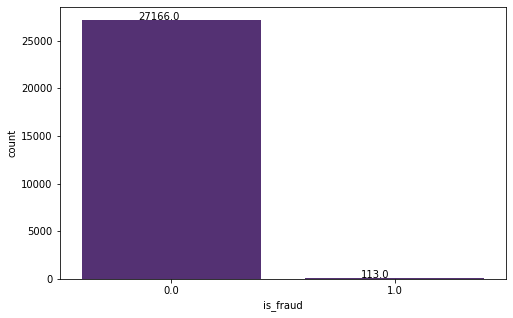

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="is_fraud", data=total,color=randomcolor())
for p in ax.patches:
     ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [ ]:
total["age"] = total["trans_date"]-total["dob"]
total["age"]=total["age"].astype('timedelta64[Y]')
total["age"].head()

0    52.0
1    30.0
2    49.0
3    32.0
4    64.0
Name: age, dtype: float64

In [ ]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27281 entries, 0 to 7814
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  27281 non-null  datetime64[ns]
 1   category               27281 non-null  object        
 2   amt                    27281 non-null  float64       
 3   gender                 27280 non-null  object        
 4   city                   27279 non-null  object        
 5   state                  27279 non-null  object        
 6   lat                    27279 non-null  float64       
 7   long                   27279 non-null  float64       
 8   city_pop               27279 non-null  float64       
 9   job                    27279 non-null  object        
 10  dob                    27279 non-null  datetime64[ns]
 11  merch_lat              27279 non-null  float64       
 12  merch_long             27279 non-null  float64       
 13  is

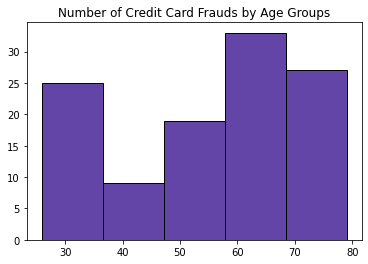

In [ ]:
fraud=total[total["is_fraud"]==1]
fig, ax = plt.subplots()
ax.hist(fraud.age, edgecolor = "black", bins = 5, color=randomcolor())
plt.title("Number of Credit Card Frauds by Age Groups")
plt.show()

In [ ]:
total['trans_month'] = pd.DatetimeIndex(total['trans_date']).month
total['trans_year'] = pd.DatetimeIndex(total['trans_date']).year



In [ ]:

import calendar
total['Month_name'] = total['trans_month'].apply(lambda x: calendar.month_abbr[x])


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


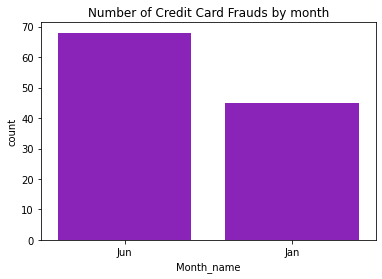

In [ ]:

sns.countplot(total[total["is_fraud"]==1]["Month_name"],color=randomcolor())
plt.title("Number of Credit Card Frauds by month")
plt.show()
del total['Month_name']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


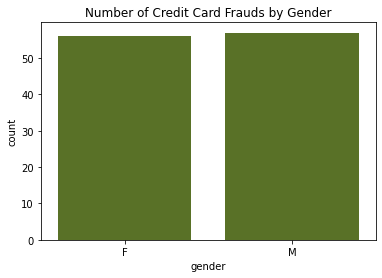

In [ ]:
sns.countplot(total[total["is_fraud"]==1]["gender"],color=randomcolor())
plt.title("Number of Credit Card Frauds by Gender")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


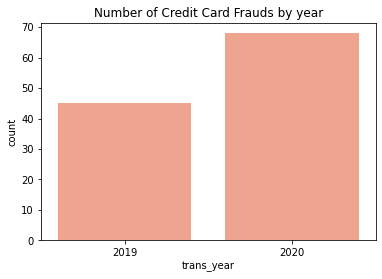

In [ ]:
sns.countplot(total[total["is_fraud"]==1]["trans_year"],color=randomcolor())
plt.title("Number of Credit Card Frauds by year")
plt.show()

In [ ]:
total['latitudinal_distance'] = abs(round(total['merch_lat']-total['lat'],3))
total['longitudinal_distance'] = abs(round(total['merch_long']-total['long'],3))

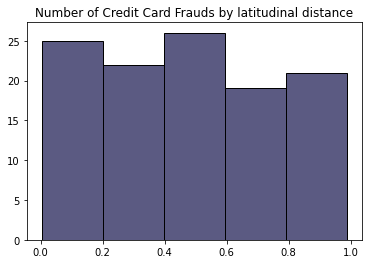

In [ ]:
fraud = total[total["is_fraud"]==1]
fig, ax = plt.subplots()
ax.hist(fraud.latitudinal_distance, edgecolor = "black", bins = 5, color=randomcolor())
plt.title("Number of Credit Card Frauds by latitudinal distance")
plt.show()

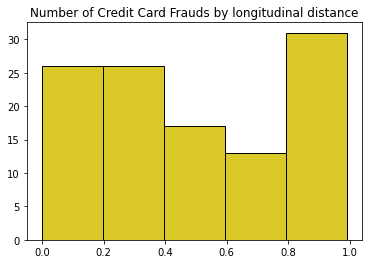

In [ ]:
fig, ax = plt.subplots()
ax.hist(fraud.longitudinal_distance, edgecolor = "black", bins = 5, color=randomcolor())
plt.title("Number of Credit Card Frauds by longitudinal distance")
plt.show()

In [ ]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27281 entries, 0 to 7814
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  27281 non-null  datetime64[ns]
 1   category               27281 non-null  object        
 2   amt                    27281 non-null  float64       
 3   gender                 27280 non-null  object        
 4   city                   27279 non-null  object        
 5   state                  27279 non-null  object        
 6   lat                    27279 non-null  float64       
 7   long                   27279 non-null  float64       
 8   city_pop               27279 non-null  float64       
 9   job                    27279 non-null  object        
 10  dob                    27279 non-null  datetime64[ns]
 11  merch_lat              27279 non-null  float64       
 12  merch_long             27279 non-null  float64       
 13  is

In [ ]:
total.gender.value_counts()

F    15052
M    12228
Name: gender, dtype: int64

In [ ]:
total.gender=total.gender.apply(lambda x: 1 if x=="M" else 0)
total.gender.value_counts()

0    15053
1    12228
Name: gender, dtype: int64

In [ ]:
drop_cols = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
total=total.drop(drop_cols,axis=1)
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27281 entries, 0 to 7814
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category               27281 non-null  object 
 1   amt                    27281 non-null  float64
 2   gender                 27281 non-null  int64  
 3   city_pop               27279 non-null  float64
 4   is_fraud               27279 non-null  float64
 5   age                    27279 non-null  float64
 6   trans_month            27281 non-null  int64  
 7   trans_year             27281 non-null  int64  
 8   latitudinal_distance   27279 non-null  float64
 9   longitudinal_distance  27279 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.3+ MB


In [ ]:
total = pd.get_dummies(total,columns=['category'],drop_first=True)
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27281 entries, 0 to 7814
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   amt                      27281 non-null  float64
 1   gender                   27281 non-null  int64  
 2   city_pop                 27279 non-null  float64
 3   is_fraud                 27279 non-null  float64
 4   age                      27279 non-null  float64
 5   trans_month              27281 non-null  int64  
 6   trans_year               27281 non-null  int64  
 7   latitudinal_distance     27279 non-null  float64
 8   longitudinal_distance    27279 non-null  float64
 9   category_food_dining     27281 non-null  uint8  
 10  category_gas_transport   27281 non-null  uint8  
 11  category_grocery_net     27281 non-null  uint8  
 12  category_grocery_pos     27281 non-null  uint8  
 13  category_health_fitness  27281 non-null  uint8  
 14  category_home          

In [ ]:
total.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_food_dining,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497.0,0.0,52.0,6,2020,0.020,0.265,0,...,0,0,0,0,0,0,1,0,0,0
1,29.84,0,302.0,0.0,30.0,6,2020,0.870,0.476,0,...,0,0,0,0,0,0,1,0,0,0
2,41.28,0,34496.0,0.0,49.0,6,2020,0.177,0.660,0,...,0,1,0,0,0,0,0,0,0,0
3,60.05,1,54767.0,0.0,32.0,6,2020,0.243,0.064,0,...,0,0,0,0,0,1,0,0,0,0
4,3.19,1,1126.0,0.0,64.0,6,2020,0.706,0.868,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.utils import resample

In [ ]:
#create two different dataframe of majority and minority class 
df_majority = total[(total['is_fraud']==0)] 
df_minority = total[(total['is_fraud']==1)] 

df_majority.shape,df_minority.shape

((27166, 22), (113, 22))

In [ ]:
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 1842743, # to match majority class
                                 random_state=42)  # reproducible results
df_minority_upsampled.shape

(1842743, 22)

In [ ]:
# Combine majority class with upsampled minority class
total_upsampled = pd.concat([df_minority_upsampled, df_majority])
total_upsampled.shape

(1869909, 22)

In [ ]:
x_cols = list(total_upsampled.columns)
x_cols.remove('is_fraud')
x_cols

['amt',
 'gender',
 'city_pop',
 'age',
 'trans_month',
 'trans_year',
 'latitudinal_distance',
 'longitudinal_distance',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel']

In [ ]:
X = total_upsampled[x_cols]
Y = total_upsampled['is_fraud']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869909 entries, 6778 to 7813
Data columns (total 21 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   gender                   int64  
 2   city_pop                 float64
 3   age                      float64
 4   trans_month              int64  
 5   trans_year               int64  
 6   latitudinal_distance     float64
 7   longitudinal_distance    float64
 8   category_food_dining     uint8  
 9   category_gas_transport   uint8  
 10  category_grocery_net     uint8  
 11  category_grocery_pos     uint8  
 12  category_health_fitness  uint8  
 13  category_home            uint8  
 14  category_kids_pets       uint8  
 15  category_misc_net        uint8  
 16  category_misc_pos        uint8  
 17  category_personal_care   uint8  
 18  category_shopping_net    uint8  
 19  category_shopping_pos    uint8  
 20  category_travel          uint8  
dtypes: float

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
 X, Y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import HalvingRandomSearchCV,RandomizedSearchCV

In [ ]:
sc= StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [ ]:
logit_model= LogisticRegression(solver='liblinear')
logit_model.fit(X_train_std, Y_train)

LogisticRegression(solver='liblinear')

In [ ]:
feature= pd.DataFrame()
feature['column']= X_train.columns
feature['importance']= logit_model.coef_[0]
feature.sort_values('importance', ascending=False, inplace=True)
feature

,column,importance
0,amt,8.443620
9,category_gas_transport,2.791260
11,category_grocery_pos,2.345069
12,category_health_fitness,1.934591
20,category_travel,1.660043
16,category_misc_pos,1.531819
10,category_grocery_net,1.284326
17,category_personal_care,1.229627
3,age,1.007725
8,category_food_dining,0.924265


In [ ]:
Logit1=LogisticRegression(solver='liblinear')

Logit1.fit(X_train_std,Y_train)

print("Score of the model with X-train and Y-train is : ", str(round(Logit1.score(X_train,Y_train)*100,2)),"%")
print("Score of the model with X-test and Y-test is : ", str(round(Logit1.score(X_test,Y_test)*100,2)),"%")

Y_pred=Logit1.predict(X_test_std)

print( " Mean absolute error is ",( mean_absolute_error(Y_test,Y_pred)))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy is " , round(accuracy_score(Y_test,Y_pred)*100,2),"%")
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Score of the model with X-train and Y-train is :  98.54 %
Score of the model with X-test and Y-test is :  98.56 %


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


 Mean absolute error is  0.008674214266996808
 Mean squared  error is  0.008674214266996808
 Median absolute error is  0.0
Accuracy is  99.13 %
F1 score:  98.95 %


In [ ]:
X_train_new=X_train[[x for x in feature[feature["importance"]>0].column]]
X_test_new=X_test[[x for x in feature[feature["importance"]>0].column]]

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X_train_sm = sm.add_constant(X_train_new)
logm = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_fraud   No. Observations:              1308936
Model:                            GLM   Df Residuals:                  1308921
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53180.
Date:                Fri, 17 Feb 2023   Deviance:                   1.0636e+05
Time:                        14:21:21   Pearson chi2:                 6.46e+16
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -6.194e-06   5.51e-07    -11.236      0.000   -7.27e-06   -5.11e-06
amt                         0.0209      0.000    110.588      0.000       0.021       0.021
category_gas_transport     11.3777      0.132     86.314      0.000      11.119      11.636
category_grocery_pos        6.6930      0.096     69.695      0.000       6.505       6.881
category_health_fitness    11.0763      0.132     84.195      0.000      10.818      11.334
category_travel            11.4040      0.137     83.411      0.000      11.136      11.672
category_misc_pos          10.6728      0.133     80.126      0.000      10.412      10.934
category_grocery_net       11.0641      0.135     81.677      0.000      10.799      11.330
category_personal_care     10.2418      0.131     78.015      0.000       9.984      10.499
age                         0.0502      0.001     72.513      0.000       0.049       0.052
category_food_dining        8.1145      0.120     67.631      0.000       7.879       8.350
category_home               6.3166      0.108     58.604      0.000       6.105       6.528
category_kids_pets          8.3122      0.133     62.471      0.000       8.051       8.573
city_pop                 4.488e-07   3.57e-08     12.561      0.000    3.79e-07    5.19e-07
trans_month                 0.0368      0.005      6.698      0.000       0.026       0.048
trans_year                 -0.0051   6.85e-05    -75.156      0.000      -0.005      -0.005
===========================================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,trans_year,95.11
0,amt,11.03
13,trans_month,5.55
2,category_grocery_pos,5.48
1,category_gas_transport,5.16
3,category_health_fitness,2.90
4,category_travel,2.44
5,category_misc_pos,2.38
6,category_grocery_net,1.99
7,category_personal_care,1.96


In [ ]:
#x_train_vif_adj = X_train_new[[x for x in list(vif[vif['VIF']<=5]['Features'])]]
x_train_vif_adj = X_train_new
#x_test_vif_adj = X_test_new[[x for x in list(vif[vif['VIF']<=5]['Features'])]]
x_test_vif_adj = X_test_new

In [ ]:
sc= StandardScaler()
X_train_vif_adj_std=sc.fit_transform(x_train_vif_adj)
X_test_vif_adj_std = sc.fit_transform(x_test_vif_adj)

In [ ]:
Logit2=LogisticRegression(solver='liblinear')

Logit2.fit(X_train_vif_adj_std,Y_train)

print("Score of the model with X-train and Y-train is : ", str(round(Logit2.score(X_train_vif_adj_std,Y_train)*100,2)),"%")
print("Score of the model with X-test and Y-test is : ", str(round(Logit2.score(X_test_vif_adj_std,Y_test)*100,2)),"%")

Y_pred=Logit2.predict(X_test_vif_adj_std)

print( " Mean absolute error is ",( mean_absolute_error(Y_test,Y_pred)))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy is " , round(accuracy_score(Y_test,Y_pred)*100,2),"%")
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score of the model with X-train and Y-train is :  99.09 %
Score of the model with X-test and Y-test is :  99.11 %
 Mean absolute error is  0.008936258964335182
 Mean squared  error is  0.008936258964335182
 Median absolute error is  0.0
Accuracy is  99.11 %
F1 score:  98.91 %


In [ ]:
matrix = confusion_matrix(Y_test,Y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)


tp, fn, fp, tn = confusion_matrix(Y_test,Y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)


matrix = classification_report(Y_test,Y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[552905      0]
 [  5013   3055]]
Outcome values : 
 552905 0 5013 3055
Classification report : 
               precision    recall  f1-score   support

           1       0.99      1.00      1.00    552905
           0       1.00      0.38      0.55      8068

    accuracy                           0.99    560973
   macro avg       1.00      0.69      0.77    560973
weighted avg       0.99      0.99      0.99    560973



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


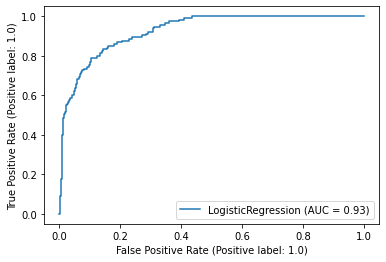

In [ ]:
plot_roc_curve(Logit2, X_test_vif_adj_std, Y_test)
plt.show()

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

amt -  0.2528873688918179
gender -  0.0003721789001514852
city_pop -  0.013322382298746813
age -  0.20734481974571725
trans_month -  0.0002656353714492512
trans_year -  0.0021735608261873097
latitudinal_distance -  0.042364416164752866
longitudinal_distance -  0.010795240632978459
category_food_dining -  0.18757768993663523
category_gas_transport -  0.0007701345070662265
category_grocery_net -  0.00015890984895636183
category_grocery_pos -  0.07486650129440629
category_health_fitness -  0.0010619244755301434
category_home -  0.07694589355680471
category_kids_pets -  0.002593316773019707
category_misc_net -  0.019015924973152416
category_misc_pos -  0.010924724676745915
category_personal_care -  0.009079126284578198
category_shopping_net -  0.03885784266267663
category_shopping_pos -  0.045172166657661945
category_travel -  0.0034502415209649953


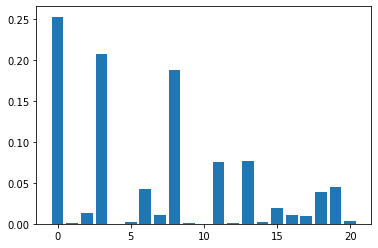

In [ ]:
importance = dtc.feature_importances_
for i,v in enumerate(importance):
    print(X_train.columns[int(i)],"- ",v)
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
print("Score the X-train with Y-train is : ", dtc.score(X_train,Y_train))
print("Score the X-test  with Y-test  is : ", dtc.score(X_test,Y_test))

Y_pred=dtc.predict(X_test)

print( " Mean absolute error is ", mean_absolute_error(Y_test,Y_pred))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy score " , accuracy_score(Y_test,Y_pred))
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.999982173830113
 Mean absolute error is  1.7826169886964256e-05
 Mean squared  error is  1.7826169886964256e-05
 Median absolute error is  0.0
Accuracy score  0.999982173830113
F1 score:  100.0 %


In [ ]:
dtc1 = DecisionTreeClassifier()

params_dtc = {
    'max_depth': [10, 20, 50, 100, 200],
    'min_samples_leaf': [10, 20, 50, 100, 200],
    'min_samples_split' : [10, 20, 50, 100, 200],
    'criterion': ["gini", "entropy"]
} 

halving_random_search=HalvingRandomSearchCV(estimator=dtc1,param_distributions = params_dtc,cv=5)
halving_random_search.fit(X_train,Y_train)
print(halving_random_search.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 250 is smaller than n_iter=65446. Running 250 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'min_samples_split': 100, 'min_samples_leaf': 10, 'max_depth': 200, 'criterion': 'gini'}


In [ ]:
print(halving_random_search.best_params_)

{'min_samples_split': 100, 'min_samples_leaf': 10, 'max_depth': 200, 'criterion': 'gini'}


In [ ]:
dtc2 = DecisionTreeClassifier(min_samples_split= 100, min_samples_leaf= 20, max_depth= 200, criterion= 'gini')
dtc2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=200, min_samples_leaf=20,
                       min_samples_split=100)

In [ ]:
print("Score the X-train with Y-train is : ", dtc2.score(X_train,Y_train))
print("Score the X-test  with Y-test  is : ", dtc2.score(X_test,Y_test))

Y_pred=dtc2.predict(X_test)

print( " Mean absolute error is ", mean_absolute_error(Y_test,Y_pred))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy score " , accuracy_score(Y_test,Y_pred))
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score the X-train with Y-train is :  0.9999633289939309
Score the X-test  with Y-test  is :  0.9999500867243165
 Mean absolute error is  4.991327568349992e-05
 Mean squared  error is  4.991327568349992e-05
 Median absolute error is  0.0
Accuracy score  0.9999500867243165
F1 score:  100.0 %


In [ ]:
matrix = confusion_matrix(Y_test,Y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)


tp, fn, fp, tn = confusion_matrix(Y_test,Y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)


matrix = classification_report(Y_test,Y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[552905      0]
 [    28   8040]]
Outcome values : 
 552905 0 28 8040
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00    552905
           0       1.00      1.00      1.00      8068

    accuracy                           1.00    560973
   macro avg       1.00      1.00      1.00    560973
weighted avg       1.00      1.00      1.00    560973



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


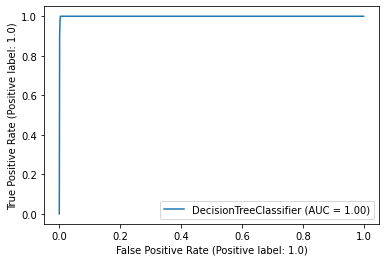

In [ ]:
plot_roc_curve(dtc2, X_test, Y_test)
plt.show()